In [15]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score
import json
from src.modeldev.data_preprocessing.data_preprocessor import DataPreprocessor
from src.modeldev.model.lgbm_classifier import get_data, prepare_data, split_data, run_expanding_backtest, train_and_predict, plot_backtest_results

import matplotlib.pyplot as plt

In [16]:
expanding_time = '1yrs'
with open(f'best_lgbm_params_{expanding_time}.json', 'r') as f:
    best_params = json.load(f)
print(f"Loaded best parameters from 'best_lgbm_params_{expanding_time}.json'.")
best_params['num_threads'] = 4

Loaded best parameters from 'best_lgbm_params_1yrs.json'.


In [17]:
df = get_data()
# Step 1: Prepare the data
df, features, target_column = prepare_data(df)
# Step 2: Split the data for hyperparameter tuning and final model training
splits = split_data(df, features, target_column)

Final Model Training Data Shape: (690257, 17)
Test Data Shape: (4787, 17)


In [18]:
df.date.sort_values()

0        1994-03-01
1        1995-01-01
2        1995-03-01
3        1995-05-01
134      1995-06-01
            ...    
691849   2025-06-01
691848   2025-06-01
691847   2025-06-01
691845   2025-06-01
695043   2025-06-01
Name: date, Length: 695044, dtype: datetime64[ns]

In [19]:
one_year_mean_auc, one_year_mean_prauc, one_year_results_df = run_expanding_backtest(df,
                                                                                     features,
                                                                                     target_column,
                                                                                     best_params,
                                                                                     start_year=2024, start_month=6, end_year=2025, end_month=6)


Starting expanding window backtesting...
Backtest for 2024-06: AUC = 0.9854
Backtest for 2024-06: PR-AUC = 0.3419
Backtest for 2024-07: AUC = 0.9682
Backtest for 2024-07: PR-AUC = 0.0114
Backtest for 2024-08: AUC = 0.9840
Backtest for 2024-08: PR-AUC = 0.5049
Backtest for 2024-09: AUC = 0.9809
Backtest for 2024-09: PR-AUC = 0.0494
Backtest for 2024-10: AUC = 0.9981
Backtest for 2024-10: PR-AUC = 0.4289


/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Backtest for 2024-11: AUC = nan
Backtest for 2024-11: PR-AUC = 0.5000


/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Backtest for 2024-12: AUC = nan
Backtest for 2024-12: PR-AUC = 0.5000


/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Backtest for 2025-01: AUC = nan
Backtest for 2025-01: PR-AUC = 0.5000


/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Backtest for 2025-02: AUC = nan
Backtest for 2025-02: PR-AUC = 0.5000


/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Backtest for 2025-03: AUC = nan
Backtest for 2025-03: PR-AUC = 0.5000
Backtest for 2025-04: AUC = 1.0000
Backtest for 2025-04: PR-AUC = 1.0000


/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Backtest for 2025-05: AUC = nan
Backtest for 2025-05: PR-AUC = 0.5000
Backtest for 2025-06: AUC = nan
Backtest for 2025-06: PR-AUC = 0.5000

Expanding Window Backtest Mean AUC: nan


/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/zhuanghao/anaconda3/envs/mlops/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


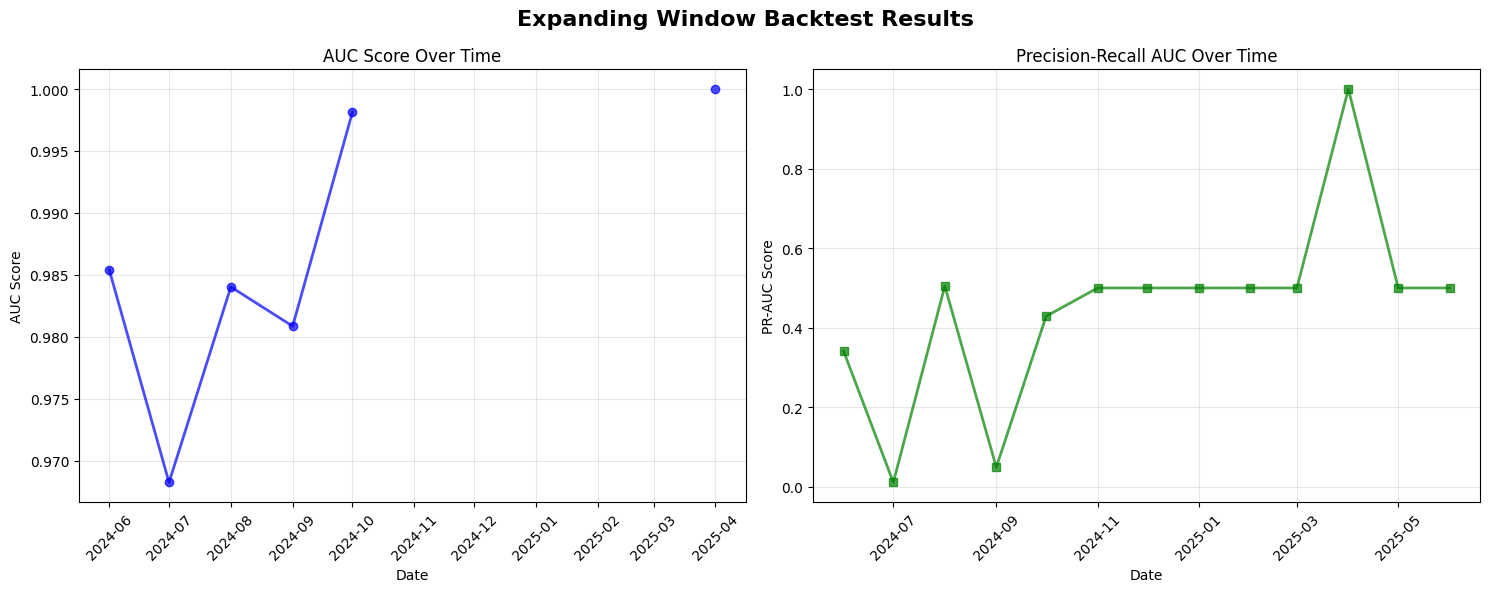

In [21]:
plot_backtest_results(one_year_results_df)

In [27]:
one_year_results_df_original = one_year_results_df.copy()

In [25]:
# one_year_results_df['rolling_pr_auc_3m'] = one_year_results_df.pr_auc.rolling(3).mean()
# one_year_results_df['rolling_test_positives_3m'] = one_year_results_df.test_positives.rolling(3).sum()
#
# one_year_results_df['rolling_pr_auc_6m'] = one_year_results_df.pr_auc.rolling(6).mean()
# one_year_results_df['rolling_test_positives_6m'] = one_year_results_df.test_positives.rolling(6).sum()
#
# one_year_results_df['rolling_pr_auc_12m'] =  one_year_results_df.pr_auc.rolling(12).mean()
# one_year_results_df['rolling_test_positives_12m'] = one_year_results_df.test_positives.rolling(12).sum()

In [6]:
import pandas as pd

In [7]:
pd.read_csv('../../../data/output/archive_log/yearly_backtest_results_10yrs.csv')

,year,auc_score,pr_auc,train_size,test_size,test_positives,test_samples
0,2015,0.758125,0.154041,251876,25981,7.0,25972
1,2016,0.819380,0.053102,277857,28856,20.0,28846
2,2017,0.690173,0.232244,306713,32461,48.0,32456
3,2018,0.728013,0.204714,339174,36785,62.0,36780
4,2019,0.878088,0.223590,375959,39197,47.0,39182
5,2020,0.900416,0.284029,415156,41377,86.0,41367
6,2021,0.927698,0.245953,456533,46102,60.0,46075
7,2022,0.888406,0.300766,502635,50881,75.0,50855
8,2023,0.949219,0.165170,553516,54366,41.0,54327
9,2024,1.000000,1.000000,607882,32811,1.0,32793
